In [1]:
# packages
#install.packages("ggcharts")
#install.packages("rhandsontable")
#install.packages("gridExtra")
#install.packages("Hmisc")
#install.packages("tidyverse")
#install.packages("plyr")
#install.packages("corrplot")
#install.packages("ggpubr")
#install.packages("ggstatsplot")
#install.packages("palmerpenguins")
library(ggstatsplot)
library(palmerpenguins)
library(ggpubr)
library(tidyverse)
library(Hmisc)
library(rhandsontable)
library(readxl)
library(plyr)
library(corrplot)
# turn off warning
options(warn=0)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Loading required package: ggplot2

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


------------------------------------------------------------------------------

You have loaded plyr af

Tôi đã đưa file dữ liệu này lên github nên ở đây tôi sẽ đọc trực tiếp nó từ github, như vậy thì bất cứ ai khi tải source code này về đều có thể đọc ngay được mà không cần tải file dữ liệu.
 

In [2]:
url <-"https://raw.githubusercontent.com/ThanhHung2112/PTDL_R/main/mouse_crawler/Ecommer_tiki(mouse).csv"
df <- read.csv(url, header = TRUE, quote = "\"",  fill = TRUE, comment.char = "", encoding = "UTF-8")

In [3]:
head(df)

,X,Name,Product_price,Discount,Sale_price,Shop,Brand,Warranty,Warranty_way,Warranty_place,Sold,Rate,Comment,X5,X4,X3,X2,X1,m_link
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60,0.05,57.1,,Bossto,0,0,0,364,4.7,93,78,8,5,0,2,https://tiki.vn/chuot-may-vi-tinh-bosston-d608-led-hang-chinh-hang-p9355345.html?spid=56764717
2,1,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148,0.00,148.0,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,B<U+1EA3>o hành chính hãng,85,4.9,24,22,2,0,0,0,https://tiki.vn/chuot-may-tinh-co-day-edra-em602-do-phan-giai-1200-dpi-choi-game-cho-laptop-hang-chinh-hang-p74463237.html?spid=90107321
3,2,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129,0.00,129.0,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,185,4.7,64,53,7,0,1,3,https://tiki.vn/chuot-may-tinh-co-day-g5-es-chuot-gaming-dpi-4-cap-do-hieu-ung-den-nen-7-mau-hang-nhap-khau-p75614175.html?spid=91088172
4,3,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145,0.00,145.0,Vi Tính Lê Huy,Newme,0,0,0,1000,4.7,135,106,20,6,0,3,https://tiki.vn/chuot-may-tinh-newmen-g10-hang-chinh-hang-p7975728.html?spid=7975732
5,4,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158,0.00,158.0,VLC6 Store,OEM,0,0,0,55,5.0,9,9,0,0,0,0,https://tiki.vn/chuot-may-tinh-van-phong-tang-lot-chuot-cao-cap-p86900816.html?spid=120777689
6,5,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299,0.36,192.0,HXSJ Official Store,HXSJ,6,Hóa don,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,39,5.0,13,13,0,0,0,0,https://tiki.vn/chuot-van-phong-co-day-chuot-game-hxsj-a885-dpi-5500-rgb-doi-7-mau-lien-tuc-hang-chinh-hang-p121169235.html?spid=121169237


# Data Information( Thông số dữ liệu)

Sau khi mở file dữ liệu chúng ta sử dụng một số hàm để kiểm tra dữ liệu và xác định tính chất của dữ liệu

Các hàm sau đây sẽ cho chúng ta thông tin về việc:
 + Missing data( thiếu dữ liệu)
 + Số cột, dòng
 + Thuộc tính dữ liệu( số, ký tự)

Từ đó, ta có thể dễ dàng xác định các biến định tính và định lượng

In [4]:
# shows the structure of the data frame
str(df)

'data.frame':	252 obs. of  19 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Name          : chr  "Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng" "Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng" "Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn "| __truncated__ "Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng" ...
 $ Product_price : num  60 148 129 145 158 ...
 $ Discount      : num  0.05 0 0 0 0 0.36 0 0.26 0 0 ...
 $ Sale_price    : num  57.1 148 129 145 158 ...
 $ Shop          : chr  "" "Extreme Zero Online" "HOÀNG NHÂN COMPUTER" "Vi Tính Lê Huy" ...
 $ Brand         : chr  "Bossto" "E-DRA" "Zealot" "Newme" ...
 $ Warranty      : int  0 24 3 0 0 6 1 12 0 3 ...
 $ Warranty_way  : chr  "0" "Tem b<U+1EA3>o hành" "Tem b<U+1EA3>o hành" "0" ...
 $ Warranty_place: chr  "0" "B<U+1EA3>o hành chính hãng" "B<U+1EA3>o hành b<U+1EDF>i 

In [5]:
describe(df)

df 

 19  Variables      252  Observations
--------------------------------------------------------------------------------
X 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     252        0      252        1    125.5    84.33    12.55    25.10 
     .25      .50      .75      .90      .95 
   62.75   125.50   188.25   225.90   238.45 

lowest :   0   1   2   3   4, highest: 247 248 249 250 251
--------------------------------------------------------------------------------
Name 
       n  missing distinct 
     252        0      246 

lowest : .Chu<U+1ED9>t Máy Tính có dây Forter FT - 3900P C<U+1EF1>c B<U+1EC1>n Hàng nh<U+1EAD>p kh<U+1EA9>u                                                                                     [ XU<U+1EA4>T KH<U+1EA8>U M<U+1EF8> ] - CHU<U+1ED8>T BLUETOOTH KHÔNG DÂY MÁY TÍNH CHOI GAME - GAME TH<U+1EE6> CHUYÊN NGHI<U+1EC6>P - THE DEOSD - TD-WME29 - HÀNG CHÍNH HÃNG            [Lo<U+1EA1>i T<U+1ED1>t] Chu<U+1ED9>t Dây Máy Tính KhoNC

Sau khi kiếm tra thông số dữ liệu ta thấy răng không có dữ liệu bị thiếu hụt trong data frame. Bây giờ, tôi sẽ tạo thêm 3 cột thể hiện tính chất của dữ liệu để ta có thể hiểu hơn

+ Valuation (Định giá) : gồm 3 phân loại: low price, good price, hight price( Giá cao, Giá tốt, Giá thấp) thể hiện tính chất của giá bán
+ Liquidity (Thanh khoản) : gồm 3 phân loại: Fast, Good, Slow (Nhanh, tốt, chậm) thể hiện xu thế của chuột máy tính trên thị trường
+ Quality (Chất lượng) : gồm 3 phân loại: Highquality, Goodquality, Lowquality, Unknow (Chất lượng cao, Chất lượng tốt, Chất lượng thấp, Chưa xác định)thể hiện chất lượng của sản phẩm dựa trên lượt đánh giá 

Với Valuation(Định giá) dựa trên thông tin ở mục Data information ta chia ra làm 3 mức 
+ Dưới 100k: Low price( Giá thấp)
+ Từ 100 --> 400k : Good price (Giá tốt)
+ Trên 400k : High price( Giá cao)

In [6]:
Valuation <- list()
for (i in df[,c('Sale_price')]) {
    if (i < 100){
        Valuation <- c(Valuation,'low price')
    } else if (i < 400) {
        Valuation <- c(Valuation,'good price')  
    } else {
        Valuation <- c(Valuation,'high price')
    }
}

Tương tự với Liquidity(Thanh khoản) ta cũng dựa vào Data Information và chia làm 3 mức:
+ Slow(chậm) : Số lượng sản phẩm bán ra < 30
+ Good(tốt) : Số lượng sản phẩm bán ra từ 30 -> 300
+ Fast(nhanh) : Số lượng sản phẩm bán ra từ 300


In [7]:
Liquidity <- list()
for (i in df[,c('Sold')]) {
    if (i < 30){
        Liquidity <- c(Liquidity,'Slow')
    } else if (i < 300) {
        Liquidity <- c(Liquidity,'Good')  
    } else {
        Liquidity <- c(Liquidity,'Fast')
    }
}

Cuối cùng là cột Quality(Chất lượng) dựa trên đánh giá của người tiêu dùng.

Với những sản phẩm chưa có đánh giá thì ta chưa thể xác định rõ chất lượng nên sẽ thuộc loại "Unknow" (Chưa xác định)
Với những sản phẩm có lượt đánh giá từ dưới 20 thì:
+ Điểm đánh giá trên 4.7 : Good quality (Chất lượng tốt)
+ Điểm đánh giá dưới 4.7 : Low qualiy (Chất lượng thấp)

Sở  dĩ như vậy là bởi với 20 sản phẩm thì ta không thể cho rẳng sản phẩm có chất lượng cao được, ngoài ra chỉ với 20 sản phẩm mà điểm đánh giá nhỏ hơn 4.7 tức là có những lượt đánh giá 1,2,3 khá nhiều.
Với 20 lượt bán mà có lượt đánh giá 1,2,3 khá nhiều thì đây không thể là sản phẩm tốt được 

Cuối cùng, khi lượt đánh giá nhiều hơn thì cũng dễ phân loại hơn hẵn, ở đây tôi cũng sẽ phân làm 3 loại:
+ Điểm đánh giá trên 4.7 : High quality (Chất lượng cao)
+ Điểm đánh giá từ 4.4 - 4.6 : Good quality (Chất lượng tốt)
+ Điểm đánh giá dưới 4.4 : Low qualiy (Chất lượng thấp)

In [8]:
Quality <- list()
n = 1
for (i in df[,c('Comment')]) {

    rate <- df[,c('Rate')][n]
    
    if (i == 0){
        Quality <- c(Quality,'Unknown')
    } else if (i < 20){
        if (rate > 4.7){
            Quality <- c(Quality,'Good quality')
        } else {
            Quality <- c(Quality,'Low quality')
        }
    } else {
        if (rate > 4.7){
            Quality <- c(Quality,'High quality')
        } else if (rate >= 4.4){
            Quality <- c(Quality,'Good quality')
        } else {
            Quality <- c(Quality,'Low quality')
        }
    }
    n <- n+1
}

Cuối cùng, thêm các cột trên vào dataframe với vị trí tương ứng.

In [9]:
df <- df %>%
  add_column(Valuation = as.character(Valuation),
             .after = "Sale_price")
df <- df %>%
  add_column(Liquidity = as.character(Liquidity),
             .after = "Sold")
df <- df %>%
  add_column(Quality = as.character(Quality),
             .after  = 'Warranty_place')

In [10]:
head(df, 10)

,X,Name,Product_price,Discount,Sale_price,Valuation,Shop,Brand,Warranty,Warranty_way,...,Sold,Liquidity,Rate,Comment,X5,X4,X3,X2,X1,m_link
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,...,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60.00,0.05,57.10,low price,,Bossto,0,0,...,364,Fast,4.7,93,78,8,5,0,2,https://tiki.vn/chuot-may-vi-tinh-bosston-d608-led-hang-chinh-hang-p9355345.html?spid=56764717
2,1,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148.00,0.00,148.00,good price,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,...,85,Good,4.9,24,22,2,0,0,0,https://tiki.vn/chuot-may-tinh-co-day-edra-em602-do-phan-giai-1200-dpi-choi-game-cho-laptop-hang-chinh-hang-p74463237.html?spid=90107321
3,2,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129.00,0.00,129.00,good price,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,...,185,Good,4.7,64,53,7,0,1,3,https://tiki.vn/chuot-may-tinh-co-day-g5-es-chuot-gaming-dpi-4-cap-do-hieu-ung-den-nen-7-mau-hang-nhap-khau-p75614175.html?spid=91088172
4,3,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145.00,0.00,145.00,good price,Vi Tính Lê Huy,Newme,0,0,...,1000,Fast,4.7,135,106,20,6,0,3,https://tiki.vn/chuot-may-tinh-newmen-g10-hang-chinh-hang-p7975728.html?spid=7975732
5,4,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158.00,0.00,158.00,good price,VLC6 Store,OEM,0,0,...,55,Good,5.0,9,9,0,0,0,0,https://tiki.vn/chuot-may-tinh-van-phong-tang-lot-chuot-cao-cap-p86900816.html?spid=120777689
6,5,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299.00,0.36,192.00,good price,HXSJ Official Store,HXSJ,6,Hóa don,...,39,Good,5.0,13,13,0,0,0,0,https://tiki.vn/chuot-van-phong-co-day-chuot-game-hxsj-a885-dpi-5500-rgb-doi-7-mau-lien-tuc-hang-chinh-hang-p121169235.html?spid=121169237
7,6,Chu<U+1ED9>t máy tính cao c<U+1EA5>p,81.44,0.00,81.44,low price,vinet shop,OEM,1,Tem b<U+1EA3>o hành,...,204,Good,4.5,79,51,18,8,1,1,https://tiki.vn/chuot-may-tinh-cao-cap-p56288980.html?spid=58946387
8,7,"Chu<U+1ED9>t máy tính có dây PROLiNK PMC1006 BDLU (den xanh), c<U+1EA3>m bi<U+1EBF>n quang h<U+1ECD>c 1000DPI - Hàng chính hãng",120.00,0.26,89.00,low price,,Prolink,12,Tem b<U+1EA3>o hành,...,15,Slow,5.0,4,4,0,0,0,0,https://tiki.vn/chuot-may-tinh-co-day-prolink-pmc1006-bdlu-den-xanh-cam-bien-quang-hoc-1000dpi-hang-chinh-hang-p112529886.html?spid=112529887
9,8,Chu<U+1ED9>t máy vi tính Bosston D608 LED - Ðen-Hàng Chính Hãng,57.40,0.00,57.40,low price,VI TÍNH NAM TRUNG H<U+1EA2>I,Bossto,0,0,...,111,Good,4.7,29,22,5,1,1,0,https://tiki.vn/chuot-may-vi-tinh-bosston-d608-led-den-hang-chinh-hang-p11191145.html?spid=48957656


# The Center Tendency (Các phép tính hướng tâm)


Ta thấy cột "Link" trong dataframe không cung cấp thông tin cho việc phân tích dữ liệu nên ta sẽ tiến hành loại bỏ cột này khỏi dataframe để tiến hành phân tích dữ liệu một cách tiện và gọn hơn

In [11]:
df <- subset( df, select = - m_link)
df <- subset( df, select = - X)

Nhờ việc xem thông số dữ liệu, ta có thể dễ dàng tìm ra được các biến định tính và định lượng:
+ Quantitative variable( Biến định lượng) : Product_price, Sale_price, Discount, Warranty, Sold, Rate, Comment, 5, 4, 3, 2, 1
+ Categorical variable( Biến định tính) : Valuation, Brand ,Warranty_way, Warranty_place, Liquidity


In [12]:
head(df)

,Name,Product_price,Discount,Sale_price,Valuation,Shop,Brand,Warranty,Warranty_way,Warranty_place,Quality,Sold,Liquidity,Rate,Comment,X5,X4,X3,X2,X1
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60,0.05,57.1,low price,,Bossto,0,0,0,Good quality,364,Fast,4.7,93,78,8,5,0,2
2,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148,0.00,148.0,good price,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,B<U+1EA3>o hành chính hãng,High quality,85,Good,4.9,24,22,2,0,0,0
3,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129,0.00,129.0,good price,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,185,Good,4.7,64,53,7,0,1,3
4,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145,0.00,145.0,good price,Vi Tính Lê Huy,Newme,0,0,0,Good quality,1000,Fast,4.7,135,106,20,6,0,3
5,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158,0.00,158.0,good price,VLC6 Store,OEM,0,0,0,Good quality,55,Good,5.0,9,9,0,0,0,0
6,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299,0.36,192.0,good price,HXSJ Official Store,HXSJ,6,Hóa don,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,39,Good,5.0,13,13,0,0,0,0


In [13]:
quantitative <- c('Product_price','Sale_price', 'Discount', 'Warranty', 'Sold', 'Rate', 'Comment', 'X5', 'X4', 'X3', 'X2', 'X1')
categorical <- c('Valuation', 'Brand' ,'Warranty_way', 'Warranty_place', 'Liquidity')

In [14]:
# describe table 
describe(df)

df 

 20  Variables      252  Observations
--------------------------------------------------------------------------------
Name 
       n  missing distinct 
     252        0      246 

lowest : .Chu<U+1ED9>t Máy Tính có dây Forter FT - 3900P C<U+1EF1>c B<U+1EC1>n Hàng nh<U+1EAD>p kh<U+1EA9>u                                                                                     [ XU<U+1EA4>T KH<U+1EA8>U M<U+1EF8> ] - CHU<U+1ED8>T BLUETOOTH KHÔNG DÂY MÁY TÍNH CHOI GAME - GAME TH<U+1EE6> CHUYÊN NGHI<U+1EC6>P - THE DEOSD - TD-WME29 - HÀNG CHÍNH HÃNG            [Lo<U+1EA1>i T<U+1ED1>t] Chu<U+1ED9>t Dây Máy Tính KhoNCC RFN100 Hàng Chính Hãng - Ð<U+1ED9> Nh<U+1EA1>y Ð<U+1EBF>n 1600dpi - C<U+1ED5>ng USB Dây 1.5 mét - KLVQ-3288-RPN100           {SIÊU R<U+1EBA>} Chu<U+1ED9>t Game Có Dây LED d<U+1ED5>i màu c<U+1EF1>c d<U+1EB9>p chuyên gaming, dây siêu b<U+1EC1>n, ch<U+1EC9>nh du<U+1EE3>c dpi m<U+1EAB>u m<U+1EDB>i 2020 -DC4245 B<U+1ED9> Bàn Phím Và Chu<U+1ED9>t Choi Game Có 10 Ch<U+1EBF> Ð<U+1ED9> 

Sử dụng hàm summary() để xem các kết quả vầ một số phép kiểm tra dữ liệu.

In [15]:
summary(df)

     Name           Product_price       Discount         Sale_price    
 Length:252         Min.   :  35.0   Min.   :0.00000   Min.   :  30.0  
 Class :character   1st Qu.:  89.0   1st Qu.:0.00000   1st Qu.:  86.0  
 Mode  :character   Median : 121.5   Median :0.00000   Median : 120.0  
                    Mean   : 184.2   Mean   :0.04647   Mean   : 167.7  
                    3rd Qu.: 189.0   3rd Qu.:0.00000   3rd Qu.: 179.0  
                    Max.   :2090.0   Max.   :0.88000   Max.   :2090.0  
  Valuation             Shop              Brand              Warranty     
 Length:252         Length:252         Length:252         Min.   : 0.000  
 Class :character   Class :character   Class :character   1st Qu.: 0.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 3.000  
                                                          Mean   : 6.905  
                                                          3rd Qu.:12.000  
                                              

Bảng tính phương sai các biến định lượng

In [16]:
#Varrian value(Phương sai)
var(df[,c(quantitative)])

,Product_price,Sale_price,Discount,Warranty,Sold,Rate,Comment,X5,X4,X3,X2,X1
Product_price,46968.004389,38365.3807316,7.981696919,3.063491e+02,4483.885368,7.12213994,1.007544e+04,8.869824e+03,8.588805e+02,1.270026e+02,71.788378628,1.453502e+02
Sale_price,38365.380732,36683.7557610,0.474227643,3.027500e+02,3589.598684,-15.84781131,1.008206e+04,8.893236e+03,8.495374e+02,1.187428e+02,72.815537374,1.453902e+02
Discount,7.981697,0.4742276,0.014593453,4.292924e-02,2.653724,0.05657691,1.320559e-01,3.618115e-02,7.272608e-02,2.032505e-02,-0.001977329,4.060425e-03
Warranty,306.349131,302.7499979,0.042929235,8.789528e+01,352.607285,0.89508632,1.532196e+03,1.341800e+03,1.367898e+02,1.938152e+01,11.528173022,2.330279e+01
Sold,4483.885368,3589.5986844,2.653723677,3.526073e+02,36352.542260,161.06205179,2.764985e+04,2.388020e+04,2.821474e+03,4.105014e+02,180.961724530,3.568675e+02
Rate,7.122140,-15.8478113,0.056576915,8.950863e-01,161.062052,5.25830567,9.729345e+01,8.261681e+01,1.090191e+01,1.726605e+00,0.679316069,1.408732e+00
Comment,10075.441987,10082.0561158,0.132055903,1.532196e+03,27649.848036,97.29344843,1.006956e+05,8.816972e+04,8.985908e+03,1.292184e+03,739.838550560,1.508321e+03
X5,8869.823817,8893.2364161,0.036181148,1.341800e+03,23880.200768,82.61681054,8.816972e+04,7.721928e+04,7.852258e+03,1.128915e+03,648.062843863,1.321303e+03
X4,858.880520,849.5373944,0.072726080,1.367898e+02,2821.473677,10.90191456,8.985908e+03,7.852258e+03,8.188167e+02,1.167593e+02,65.370280782,1.329200e+02
X3,127.002569,118.7428373,0.020325049,1.938152e+01,410.501423,1.72660469,1.292184e+03,1.128915e+03,1.167593e+02,1.751028e+01,9.576930374,1.951129e+01


Tính giá trị yếu vị của dữ liệu.

In [17]:
Mode <- function(dataframe){
    mode <- c()
    name <- c()

    getmode <- function(v) {
        uniqv <- unique(v)
        uniqv[which.max(tabulate(match(v, uniqv)))]
    }
    for (i in names(dataframe)){
        name <- c(name,i)
    } 
    for (i in 1:length(dataframe)){
        mode <- c(mode, getmode(df[,i]))
    }
    data.frame(name,mode)
}

In [18]:
Mode(df)

name,mode
<chr>,<chr>
Name,"Chu<U+1ED9>t máy tính có dây G3SE thi<U+1EBF>t k<U+1EBF> nh<U+1ECF> g<U+1ECD>n, Led bao quanh d<U+1EB9>p m<U+1EAF>t, DPI tùy ch<U+1EC9>nh"
Product_price,99
Discount,0
Sale_price,99
Valuation,good price
Shop,
Brand,OEM
Warranty,0
Warranty_way,0


Dưới đây là số lượng sản phẩm mà của các brand.

In [19]:
table(df$Brand)


      #NAME?        A4Tec        ACTTO      ADBLink        Ajazz         AKKO 
           6            7            1            1            1            2 
     amayoko       APEDRA        argus    Assassins       Bossto        Casio 
           3            3            1            1            9            2 
    CHOETECH        DareU         Dell        E-DRA      e Deosd      eamwolf 
           1            2            2            5            1            1 
     Earldom        EIPLN       Elecom        Extec       Forder        FOREV 
           2            1            8            1            1            1 
      Fortec       Forter        Fuhle      GENERAL       Genius   Ghost Wolf 
           1            2           12            1           11            1 
Golden Field           HP         HXSJ        Imice       Inphic          Kak 
           2            1            4            1            1            1 
      KhoNCC     King Jim           Ko        Langt

In [20]:
data = data.frame(table(df$Brand))
head(data)

,Var1,Freq
,<fct>,<int>
1,#NAME?,6
2,A4Tec,7
3,ACTTO,1
4,ADBLink,1
5,Ajazz,1
6,AKKO,2


In [21]:
table(data$Freq)


 1  2  3  4  5  6  7  8  9 10 11 12 23 65 
34 13  5  2  1  2  2  1  1  1  1  1  1  1 

Bảng giá trị Correlation

In [22]:
# dependencies between values(sư phụ thuộc của dữ liệu)
correlation = cor(df[,c(quantitative)])
correlation

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Product_price,Sale_price,Discount,Warranty,Sold,Rate,Comment,X5,X4,X3,X2,X1
Product_price,1.00000000,0.92427576,0.304870318,0.15077621,0.1085141,0.01433133,0.146506813,0.147282473,0.13849636,0.14004414,0.139853101,0.138694787
Sale_price,0.92427576,1.00000000,0.020496086,0.16860268,0.0982973,-0.03608357,0.165884949,0.167093698,0.15500734,0.14815763,0.160511507,0.156979828
Discount,0.30487032,0.02049609,1.000000000,0.03790455,0.1152151,0.20423836,0.003444876,0.001077806,0.02103865,0.04020741,-0.006910649,0.006950852
Warranty,0.15077621,0.16860268,0.037904551,1.00000000,0.1972609,0.04163506,0.515022511,0.515041572,0.50989127,0.49403600,0.519154627,0.514008960
Sold,0.10851407,0.09829730,0.115215065,0.19726095,1.0000000,0.36838583,0.457004129,0.450720913,0.51714849,0.51451824,0.400717531,0.387066154
Rate,0.01433133,-0.03608357,0.204238358,0.04163506,0.3683858,1.00000000,0.133707402,0.129653021,0.16614471,0.17993825,0.125074272,0.127043059
Comment,0.14650681,0.16588495,0.003444876,0.51502251,0.4570041,0.13370740,1.000000000,0.999888032,0.98960848,0.97313431,0.984352698,0.982956305
X5,0.14728247,0.16709370,0.001077806,0.51504157,0.4507209,0.12965302,0.999888032,1.000000000,0.98750279,0.97084953,0.984630448,0.983297979
X4,0.13849636,0.15500734,0.021038646,0.50989127,0.5171485,0.16614471,0.989608485,0.987502789,1.00000000,0.97510566,0.964508390,0.960599807
X3,0.14004414,0.14815763,0.040207407,0.49403600,0.5145182,0.17993825,0.973134311,0.970849528,0.97510566,1.00000000,0.966270765,0.964239681


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

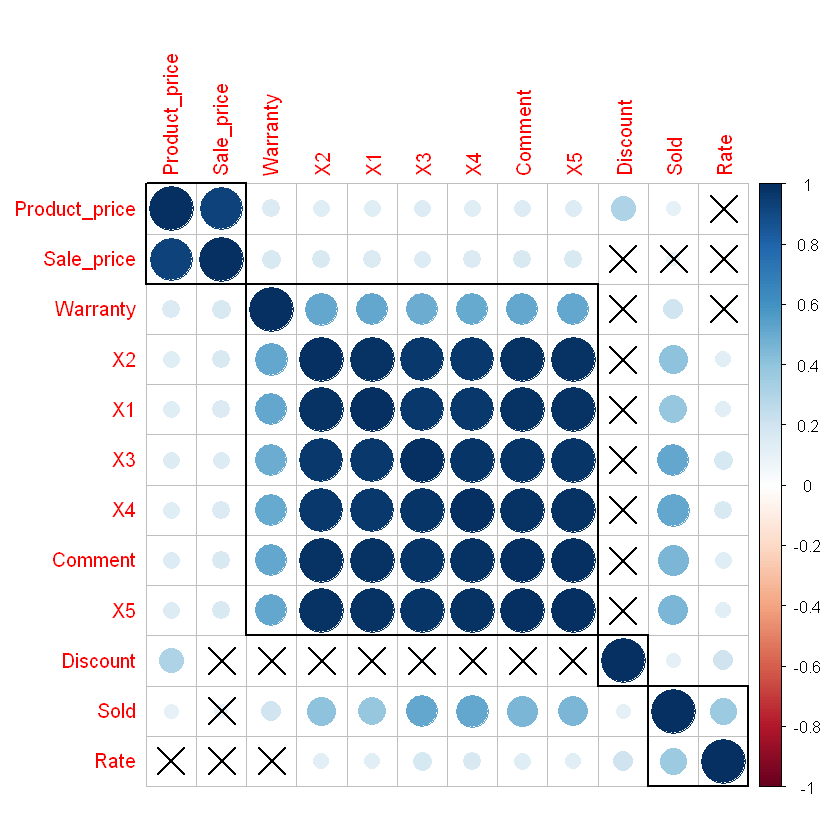

In [23]:
# plot of dependencies value (biểu đồ thể hiện sự phụ thuộc của dữ liệu)
testRes = cor.mtest(df[,c(quantitative)], conf.level = 0.95)

corrplot(correlation, order = 'hclust', addrect = 4,p.mat = testRes$p, sig.level = 0.10)

# Data Visualization( Trực quan hóa dữ liệu)

Trực quan hóa dữ liệu là việc sử dụng các biểu đồ, hình ảnh để thể hiện dữ liệu

Việc trực quan hóa dữ liệu giúp ta có một cái nhìn rõ ràng và thêm tổng quát hơn về dữ liệu, giúp nhìn nhận rõ ràng những vấn đề của dữ liệu và so sánh một cách dễ dàng

**Biểu đồ thể hiện số lượng sản phẩm bán ra thị trưởng ở Tiki của các Brand**

In [24]:
data = aggregate(Sold ~ Brand, df, sum)
head(data, 10)

,Brand,Sold
,<chr>,<int>
1,#NAME?,0
2,A4Tec,170
3,ACTTO,0
4,ADBLink,0
5,Ajazz,0
6,AKKO,0
7,amayoko,2318
8,APEDRA,19
9,argus,0


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

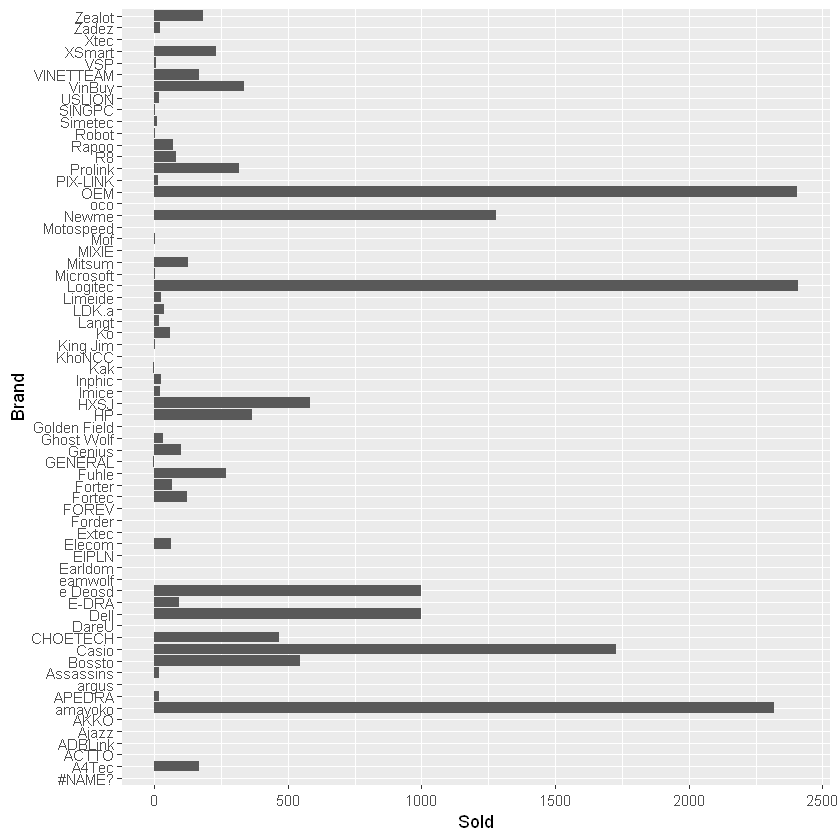

In [25]:
# Biểu đồ thể hiện số lượng sản phẩm bán được giữa các brand

ggplot(data, aes(x=Brand, y=Sold)) + 
  geom_bar(stat = "identity") + 
  coord_flip()

**Nhận xét:**
+ Từ biểu đồ ta có thể thấy được có rất nhiều Brand ở đây.Tuy nhiên giữa các Brand có sự chênh lệch rất lớn về số lượng sản phẩm bán ra
+ Dẫn đầu là các hãng rất nổi tiếng như Logitech, OEM, Amayoko, Newme... Đây đều là những thương hiệu rất nổi tiếng và có được sự tin cậy từ người dùng nên việc số lượng chuột được bán ra tập trung vào cấc hãng này cũng là điều dễ hiểu
+ Đa số các Brand khác bán được rất ít hoặc không bán được sản phẩm của mình ở Tiki 
+ Ngoài ra ở tiki dữ liệu hiển thị số lượt bán ra tối da là 1000 nên dữ liệu thật tế có thể còn chênh lệch nhiều hơn nữa

**Biểu đồ thể hiện giá bán ở Tiki**

In [26]:
data = data.frame(table(df$Valuation))
data

Var1,Freq
<fct>,<int>
good price,139
high price,15
low price,98


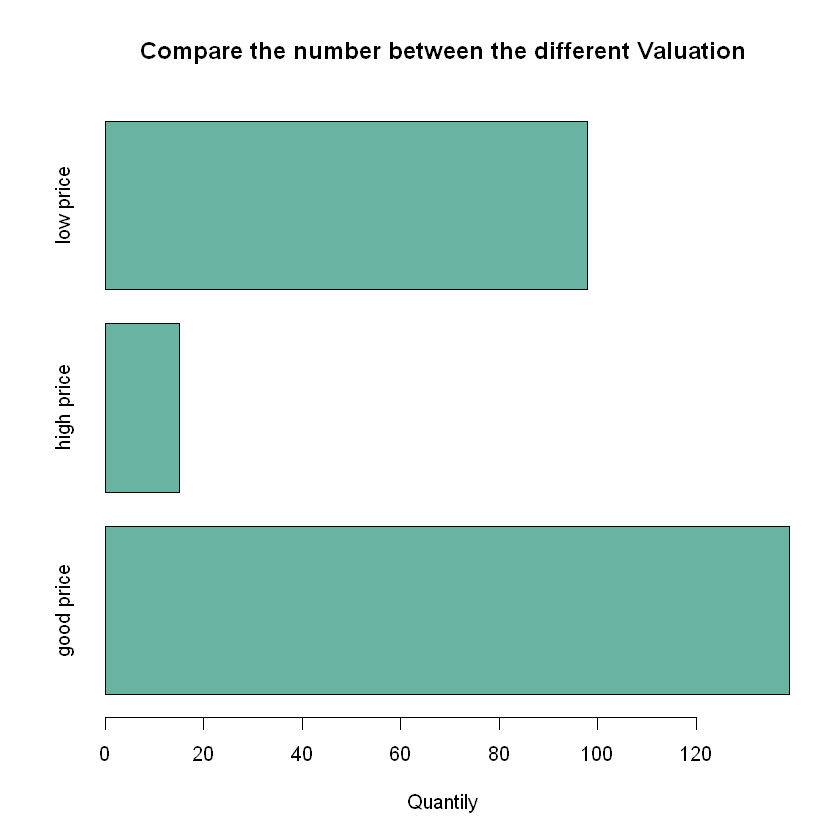

In [27]:
barplot(height=data$Freq, names=data$Var1,  
        col="#69b3a2",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number between the different Valuation",
        )

**Nhận xét:**
+ Đa số sản phẩm đều có mức giá thấp(lowprice) hoặc giá tốt(Goodprice)
+ Sản phẩm có giá cao(Highprice) có số lượng ít hơn các mức giá còn lại rất nhiều(khoảng 20 sản phẩm)
+ Từ đồ thị ta thấy các mặt hàng chuột máy tính trên Tiki được bán với giá Giá mềm và chủ yếu dưới 400k

**Biều đồ thể hiện tốc độ bán của các mặt hàng trên Tiki**

In [28]:
data = data.frame(table(df$Liquidity))
data

Var1,Freq
<fct>,<int>
Fast,17
Good,40
Slow,195


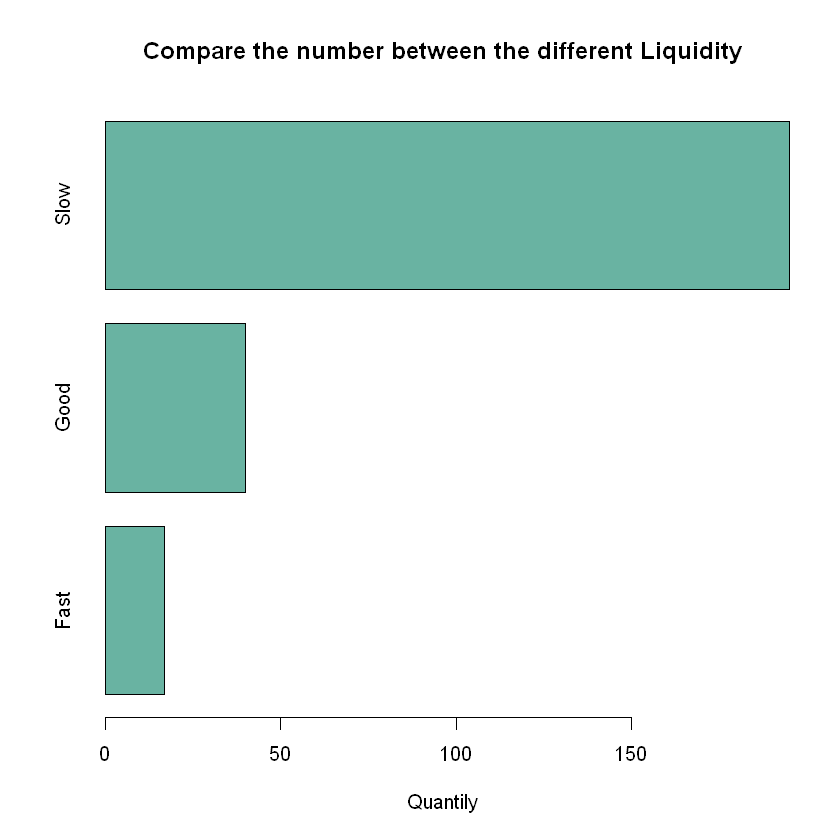

In [29]:
barplot(height=data$Freq, names=data$Var1,  
        col="#69b3a2",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number between the different Liquidity",
        )

**Nhận xét:**
+ Tốc độ bán càng nhanh thì số lượng càng ít
+ Ở mức slow có sự chênh lệch lớn chiếm đến tận hơn 50% tổng số sản phẩm được bán ra. Xem ra khách hàng vẫn chưa thật sự tin tưởng khi mua hàng trên Tiki
+ Các hãng vẫn chưa thể bán tốt sản phẩm của mình ở thị trưởng của Tiki

**Biểu đồ thể hiện chất lượng sản phẩm dựa trên đánh giá người dùng ở Tiki**

In [30]:
data = aggregate(df$Quality, by=list(df$Quality), FUN=length)
data

Group.1,x
<chr>,<int>
Good quality,56
High quality,17
Low quality,50
Unknown,129


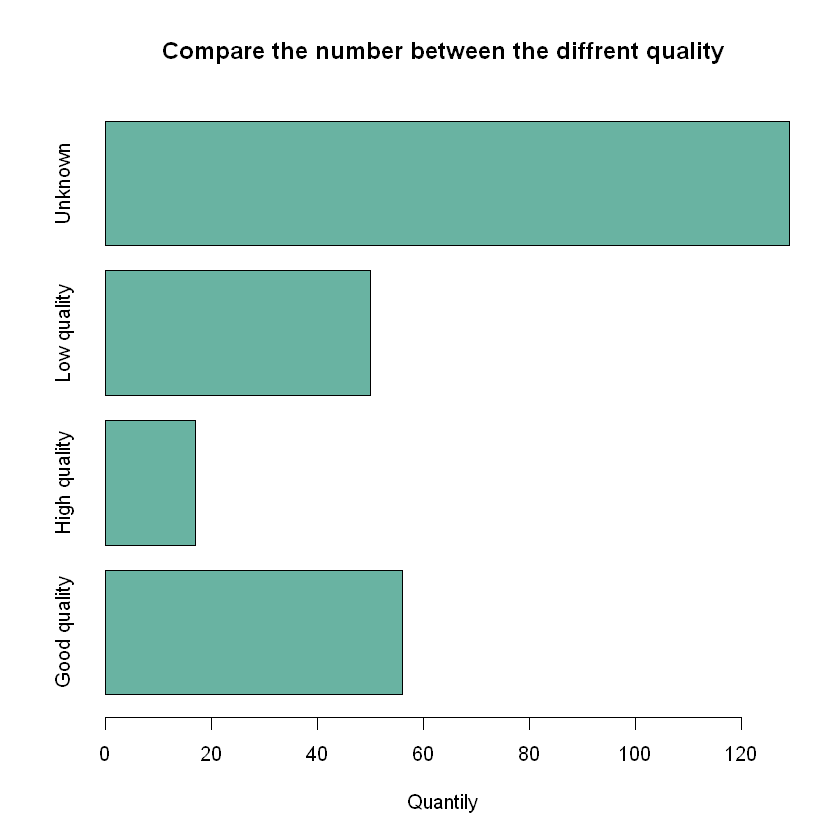

In [31]:
barplot(height=data$x, names=data$Group.1,
        col="#69b3a2",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number between the diffrent quality",
        )

**Nhận xét:**
+ Mục Unknow có số lượng sản phẩm lớn hơn hẳn so với tất cả các mục chất lượng còn lại
+ Số lượng sản phẩm đạt chất lượng cao ơ trên Tiki rất ít dưới 10% tổng số lượng
+ Nhìn chung những sản phẩm được bán trên Tiki khi đã được đánh giá thì có tỉ lệ đạt chất lượng tốt trở lên khá cao( điểm đánh giá trên 4.4)

In [32]:
counts <- data.frame(table(df$Warranty))
names(counts) <- c('Time','Number')
counts

Time,Number
<fct>,<int>
0,108
1,7
3,19
6,19
9,1
11,1
12,74
18,1
24,17


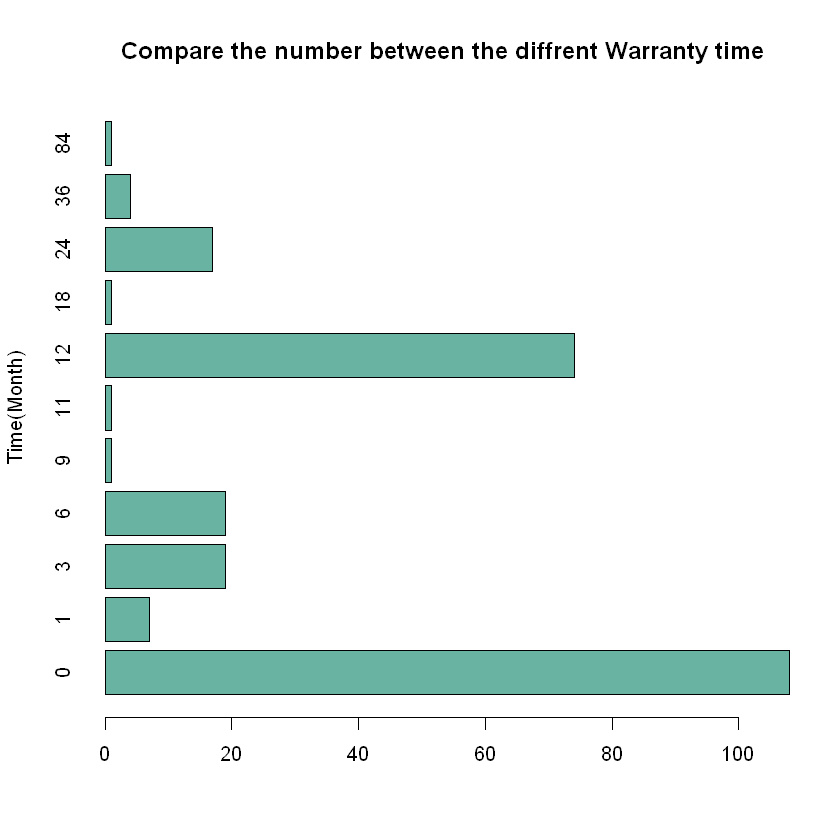

In [33]:
barplot(height=counts$Number, names=counts$Time,
        col="#69b3a2",
        horiz=T, las=0,
        ylab="Time(Month)", 
        main="Compare the number between the diffrent Warranty time",
        )

**Nhận xét:**
+ Có rất nhiều sản phẩm được bán mà không có chính sách bảo hành kèm theo
+ Trong các sản phẩm nếu đươc bảo hành thì đa số đều bảo hành 1 năm
+ Sản phảm hưởng chính sách bảo hành cao nhất lên đến 84 tháng(7năm)

In [34]:
data = data.frame(table(df$Warranty_way))
data

Var1,Freq
<fct>,<int>
0,118
Ði<U+1EC7>n t<U+1EED>,21
Hóa don,24
Phi<U+1EBF>u b<U+1EA3>o hành,9
Tem b<U+1EA3>o hành,80


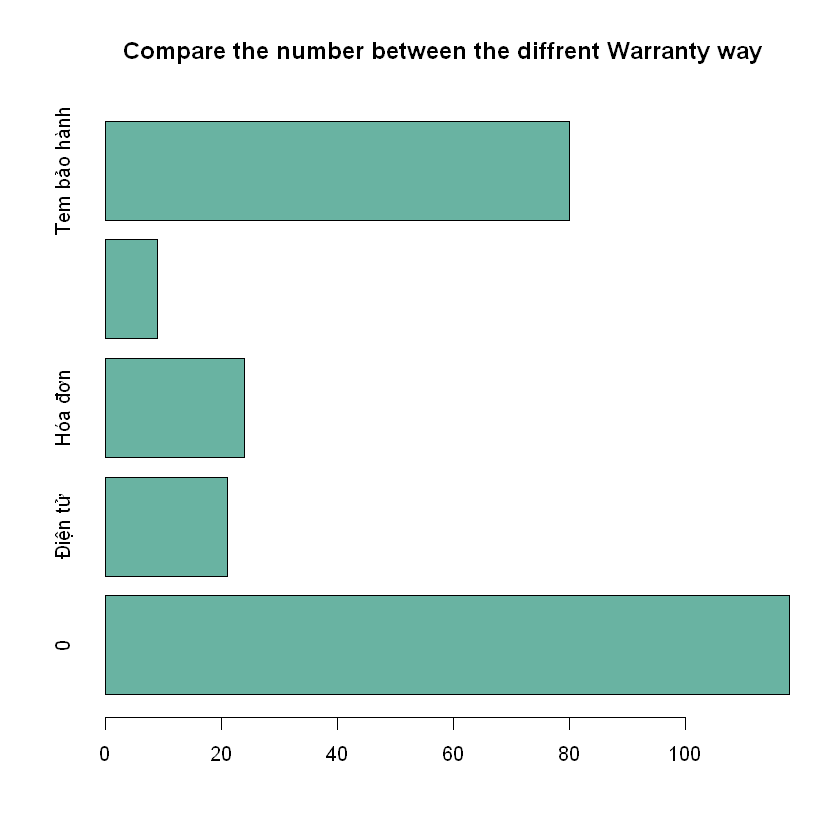

In [35]:
barplot(height=data$Freq, names=data$Var1,
        col="#69b3a2",
        horiz=T, las=0,
        main="Compare the number between the diffrent Warranty way",
        )

**Nhận xét:**
+ Có rất nhiều sản phẩm không có hình thức bảo hành rõ ràng trên thị trường.
+ Rất ít sản phẩm được bảo hành theo phiếu bảo hành, trong khi đó hình thức bảo hành phổ biến nhất là team bảo hành.
+ Bảo hành dựa trên hóa đơn và team bảo hành dường như không được phổ biến do không tiện lợi


**Biểu đồ cho thấy các nơi bảo hành của Tiki**

In [36]:
data = data.frame(table(df$Warranty_place))
data

Var1,Freq
<fct>,<int>
0,118
B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,70
B<U+1EA3>o hành chính hãng,64


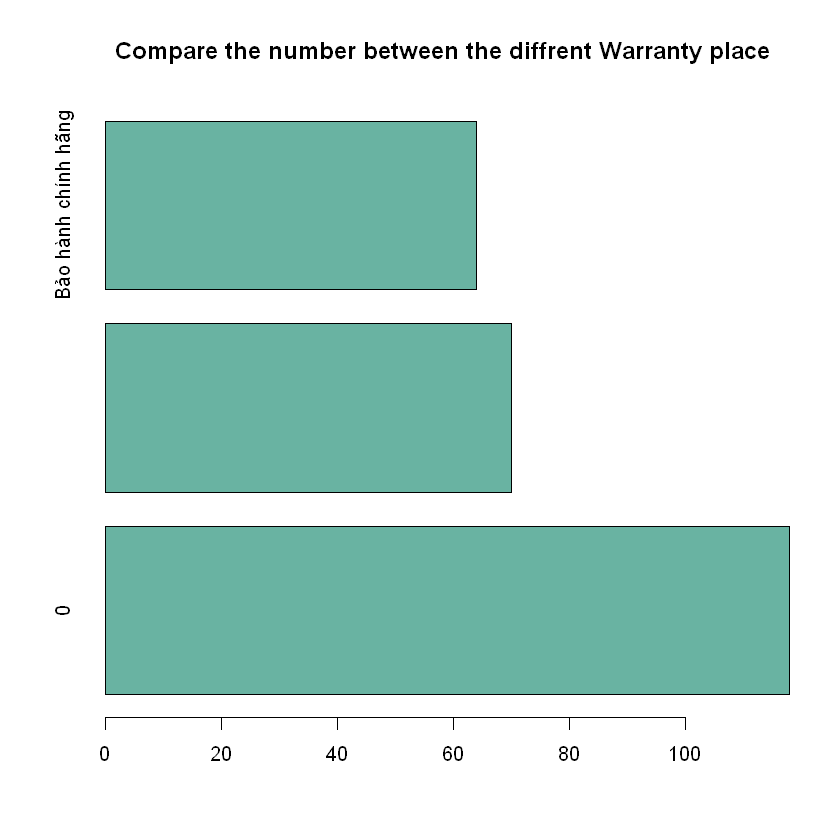

In [37]:
barplot(height=data$Freq, names=data$Var1,
        col="#69b3a2",
        horiz=T, las=0,
        main="Compare the number between the diffrent Warranty place",
        )

In [38]:
head(df)

,Name,Product_price,Discount,Sale_price,Valuation,Shop,Brand,Warranty,Warranty_way,Warranty_place,Quality,Sold,Liquidity,Rate,Comment,X5,X4,X3,X2,X1
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60,0.05,57.1,low price,,Bossto,0,0,0,Good quality,364,Fast,4.7,93,78,8,5,0,2
2,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148,0.00,148.0,good price,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,B<U+1EA3>o hành chính hãng,High quality,85,Good,4.9,24,22,2,0,0,0
3,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129,0.00,129.0,good price,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,185,Good,4.7,64,53,7,0,1,3
4,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145,0.00,145.0,good price,Vi Tính Lê Huy,Newme,0,0,0,Good quality,1000,Fast,4.7,135,106,20,6,0,3
5,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158,0.00,158.0,good price,VLC6 Store,OEM,0,0,0,Good quality,55,Good,5.0,9,9,0,0,0,0
6,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299,0.36,192.0,good price,HXSJ Official Store,HXSJ,6,Hóa don,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,39,Good,5.0,13,13,0,0,0,0


# Các phép kiểm định
---

# Kiểm tra phân phối chuẩn(Normal ditribution)

Trước khi tiến hành các phép kiểm định, ta cần kiểm tra phân phối chuẩn của dữ liệu. Nếu dữ liệu không chuẩn, thì ta phải chọn những phép kiểm định phi tham số để kiểm định

Ở đây, tôi sẽ xây dựng hàm kiểm định phân phối chuẩn trước, như vậy trc khi tiến hành kiểm định tôi có thể dễ dàng kiểm tra phân phối chuẩn và chọn một phép kiểm định khác



In [40]:
#install.packages("nortest")
library(nortest)

In [41]:
normal_ditribution <- function(data, col){
    
    # shapiro - wilk
    print(shapiro.test(col))
    # Anderson-Darling
    print(ad.test(col))
    # histplot
    histplot = ggplot(data = data,aes(col))+
    geom_histogram(aes(y=..density..),color="black",fill="cyan")+
    stat_function(fun = dnorm,
                    args = list(mean = mean(col,na.rm = TRUE),
                                sd = sd(col,na.rm = TRUE)),
                    color ='red',size = 1)
    print(histplot)
    # qqplot
    qqplot = ggqqplot(col)
    print(qqplot)
}
#normal_ditribution(df,df$Rate)


	Shapiro-Wilk normality test

data:  col
W = 0.70251, p-value < 2.2e-16


	Anderson-Darling normality test

data:  col
A = 34.679, p-value < 2.2e-16



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



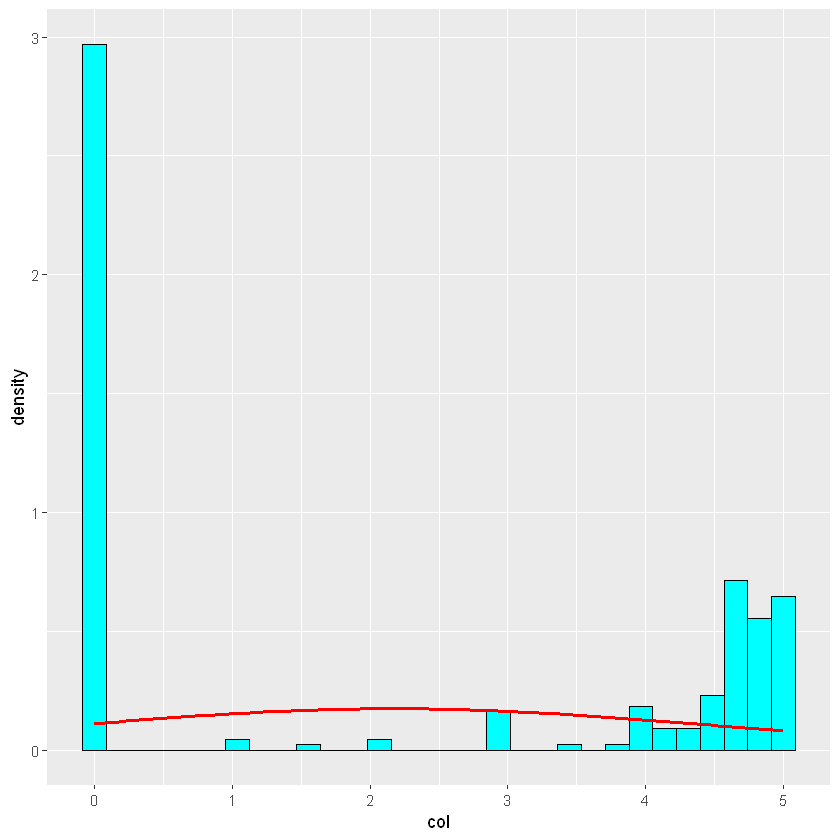

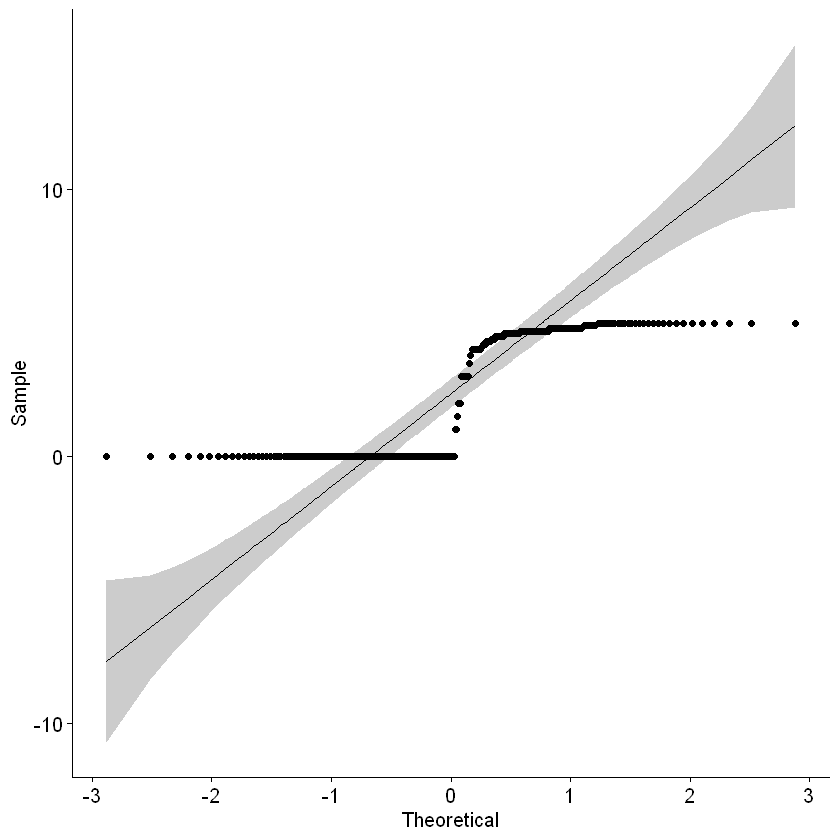

In [42]:
normal_ditribution(df, df$Rate)


	Shapiro-Wilk normality test

data:  col
W = 0.48515, p-value < 2.2e-16


	Anderson-Darling normality test

data:  col
A = 32.164, p-value < 2.2e-16



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



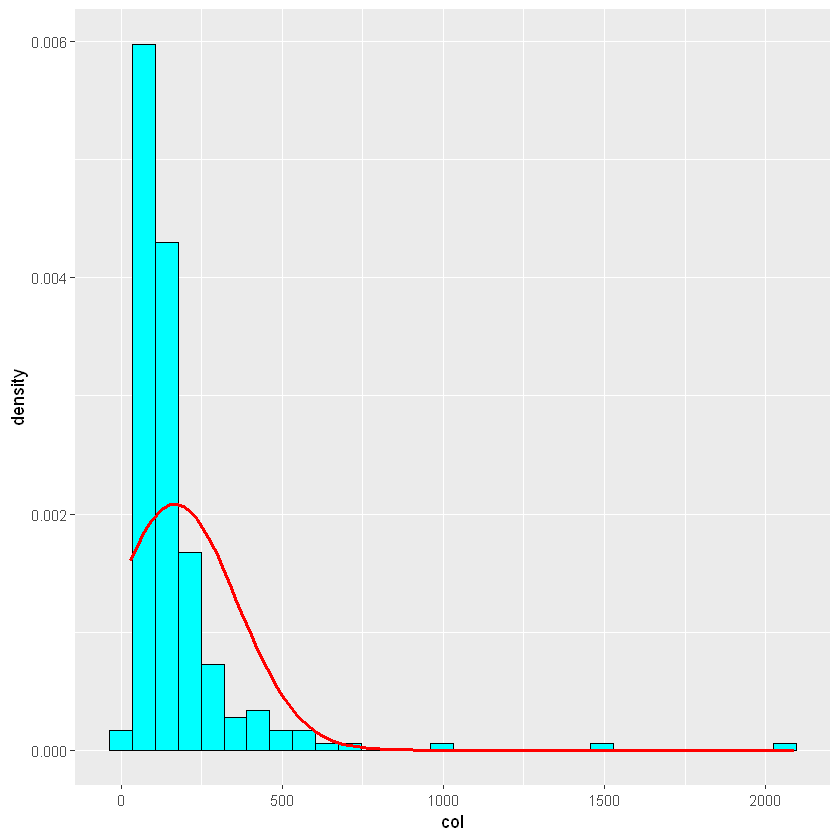

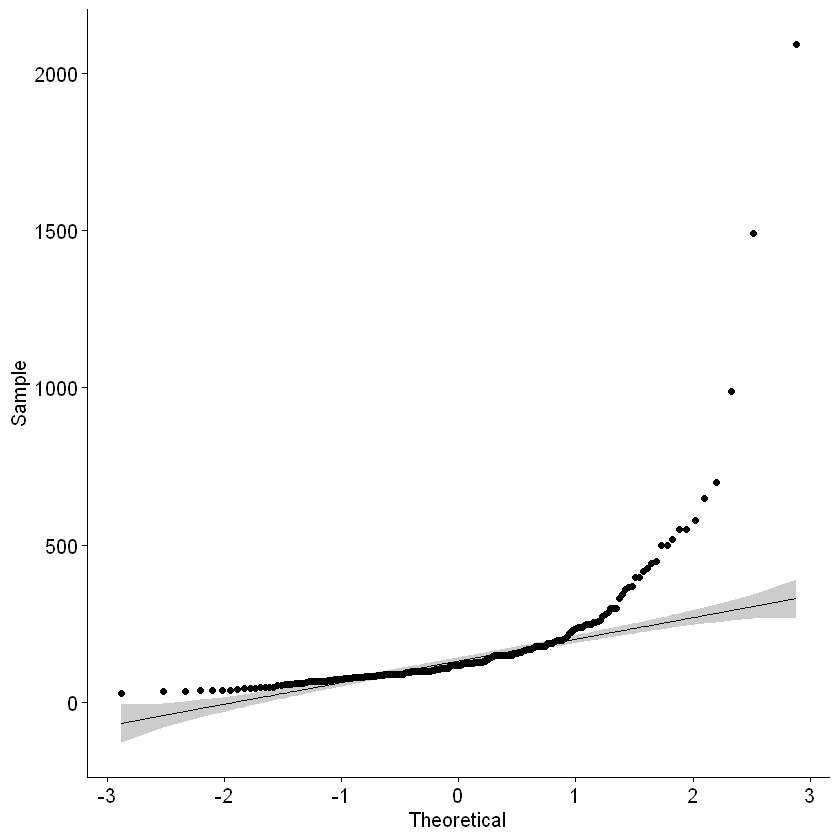

In [43]:
normal_ditribution(df, df$Sale_price)


	Shapiro-Wilk normality test

data:  col
W = 0.3905, p-value < 2.2e-16


	Anderson-Darling normality test

data:  col
A = 60.371, p-value < 2.2e-16



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



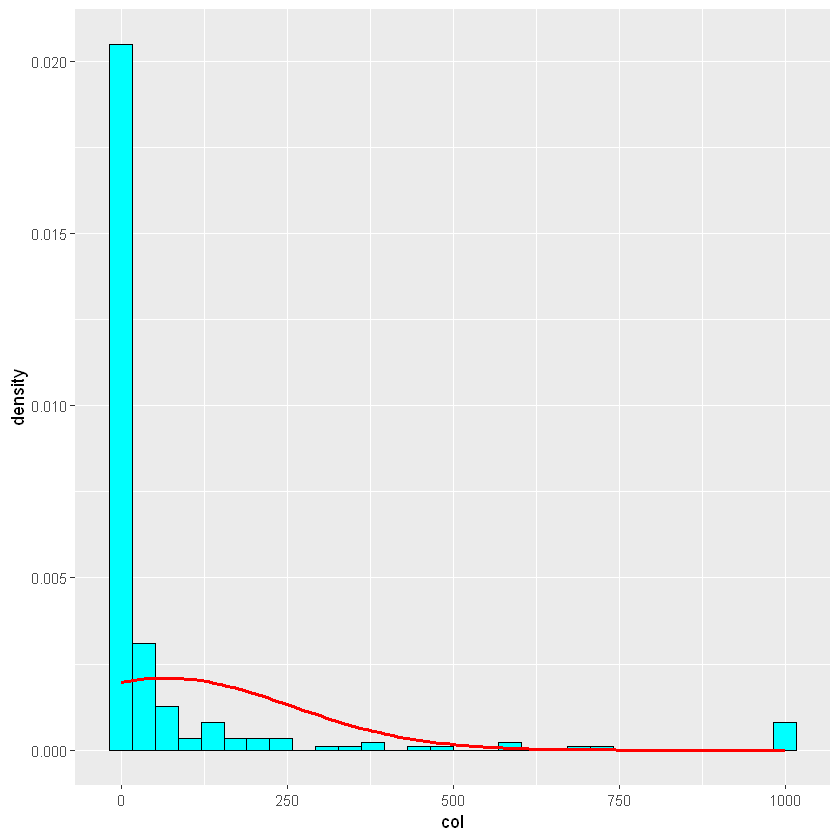

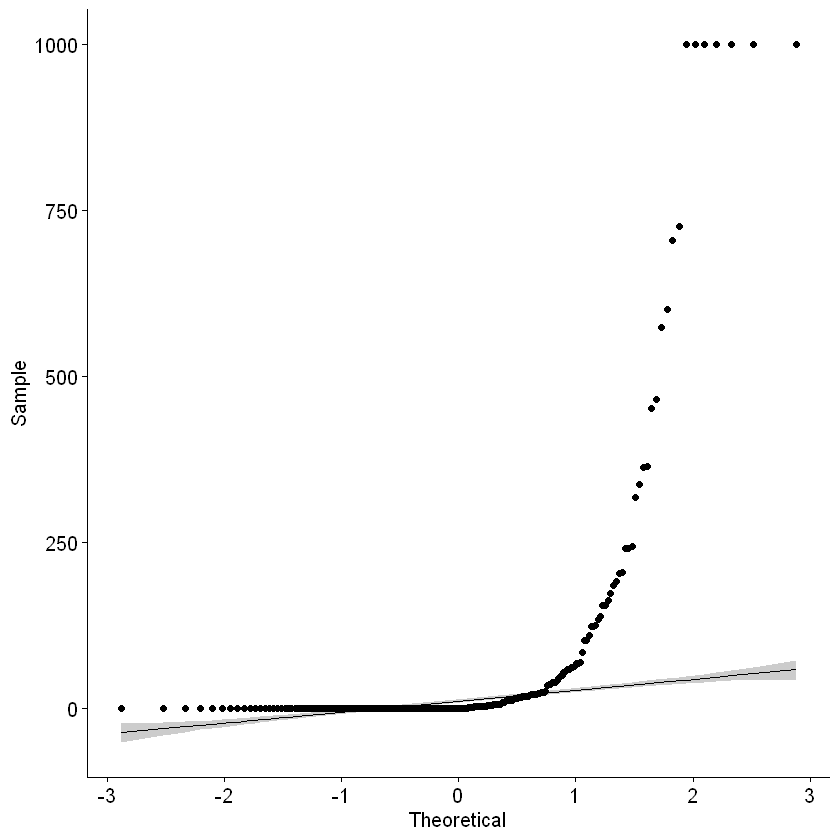

In [44]:
normal_ditribution(df, df$Sold)


	Shapiro-Wilk normality test

data:  col
W = 0.083118, p-value < 2.2e-16


	Anderson-Darling normality test

data:  col
A = 82.622, p-value < 2.2e-16



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



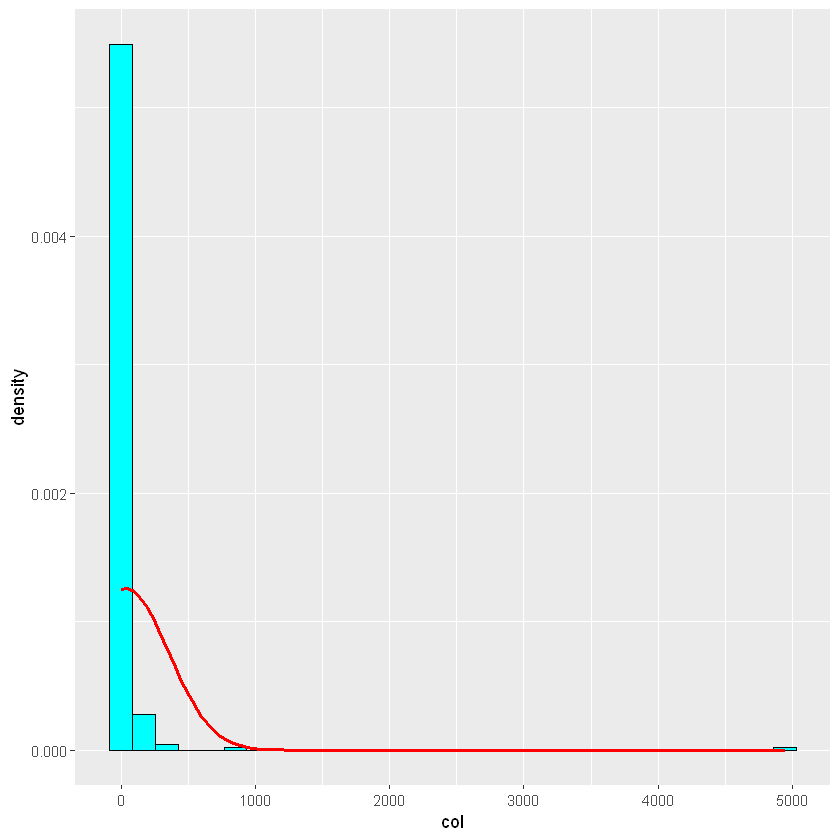

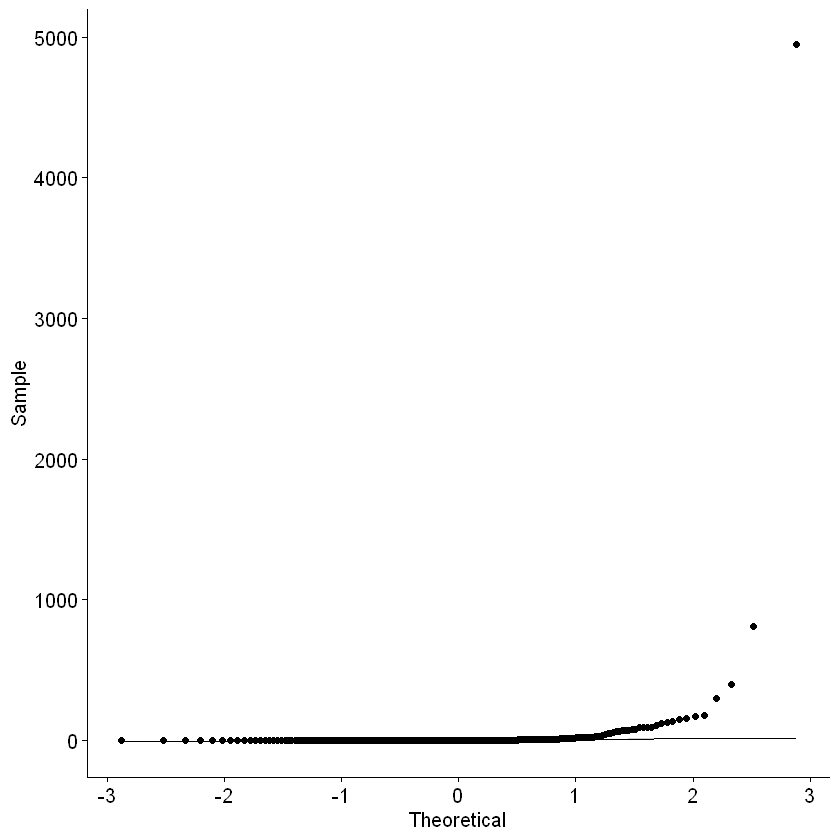

In [45]:
normal_ditribution(df, df$Comment)

Sau khi kiểm tra các các trường dữ liệu thì kết quả cho thấy dữ liệu không có phân phối chuẩn nên ta sẽ sử dụng các loại kiểm định phi tham số để kiểm tra các giả thuyết

# Kiểm định Chisquare

Chisquare là kiểm định kiểm tra sự độc lập giữa hai biến mà không cần kiểm tra phân phối chuẩn


---------
**Phát biểu giả thuyết:**

Kiểm định xem Giá cả có ảnh hưởng đến chất lượng của sản phẩm với sự đánh giá của khách hàng không.

+ H0 : Giá cả Không ảnh hưởng đến chất lượng sản phẩm (Hai giá trị này độc lập với nhau)
+ H1 : Giá cả ảnh hưởng đến chất lượng sản phẩm (Hai giá trị này phụ thuộc nhau)

In [46]:
table(df$Valuation,df$Quality)
chisq.test(df$Valuation, df$Quality)

            
             Good quality High quality Low quality Unknown
  good price           30           13          29      67
  high price            1            3           1      10
  low price            25            1          20      52

Warning message in chisq.test(df$Valuation, df$Quality):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  df$Valuation and df$Quality
X-squared = 14.617, df = 6, p-value = 0.02346


pvalue < 0.05 

Chưa giả đủ điều kiện chấp nhận giả thuyết H0. Điều này có nghĩa là Giá cả ảnh hưởng đến chất lượng sản phẩm

Chú ý: Chất lượng ở đây nói về sự phù hợp của giá cả so với chất lượng sản phẩm 

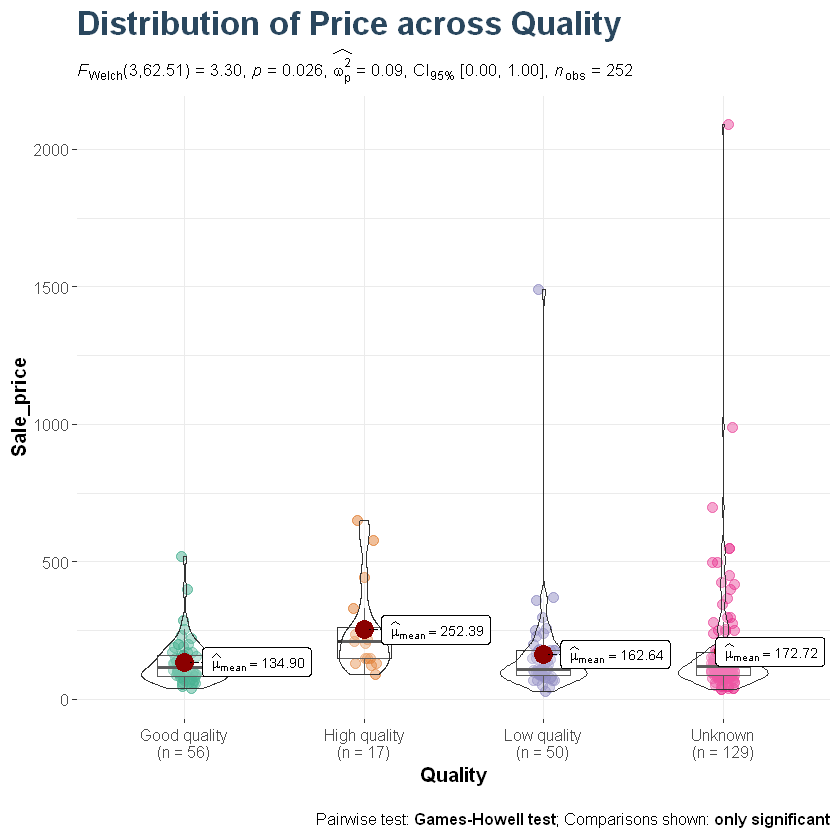

In [47]:
ggbetweenstats(
  data = df,
  x = Quality,
  y = Sale_price
) + labs(
    title = "Distribution of Price across Quality"
  ) +
    theme(
    # This is the new default font in the plot
    text = element_text(size = 12, color = "black"),
    plot.title = element_text(
      #family = "Tahoma", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ))

**Nhận xét:**
+ Từ biểu đồ ta có thể thấy chất lượng sản phẩm càng tốt thì khoảng tập trung giá cả của dữ liệu càng cao hơn
+ Mục Unknow chiếm tỉ lệ rất cao trong tổ số lượng sản phẩm khiến việc phân loại chất lượng và đánh giá gặp khó khăn
+ Các sản phẩm Highquality có sự phân bố đồng đều hơn về giá. Trong khi đó Lowquality và Goodquality só sự tập trung dữ liệu về 1 điểm khá giống nhau


-------------------------------------------------------
**Phát biểu giả thuyết:**

Kiểm định xem chất lượng sản phẩm có ảnh hưởng đến tốc độ bán của sản phẩm không ?

+ H0 : Chất lượng sản phẩm(Quality) không ảnh hưởng đến tốc độ bán của sản phẩm(Liquidity) (Hai Biến này độc lập với nhau)
+ H1 : Chất lượng sản phẩm(Quality) ảnh hưởng đến tốc độ bán của sản phẩm( Liquidity)( Hai biến này phụ thuộc nhau)

In [48]:
table(df$Liquidity,df$Quality)
chisq.test(df$Liquidity,df$Quality)

      
       Good quality High quality Low quality Unknown
  Fast            6            9           1       1
  Good           23            8           9       0
  Slow           27            0          40     128

Warning message in chisq.test(df$Liquidity, df$Quality):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  df$Liquidity and df$Quality
X-squared = 144.32, df = 6, p-value < 2.2e-16


pvalue < 0.05 

Chấp nhận giả thuyết H1. Điều này có nghĩa là chất lưởng sản phẩm ảnh hưởng đến tốc độ bán của sản phẩm

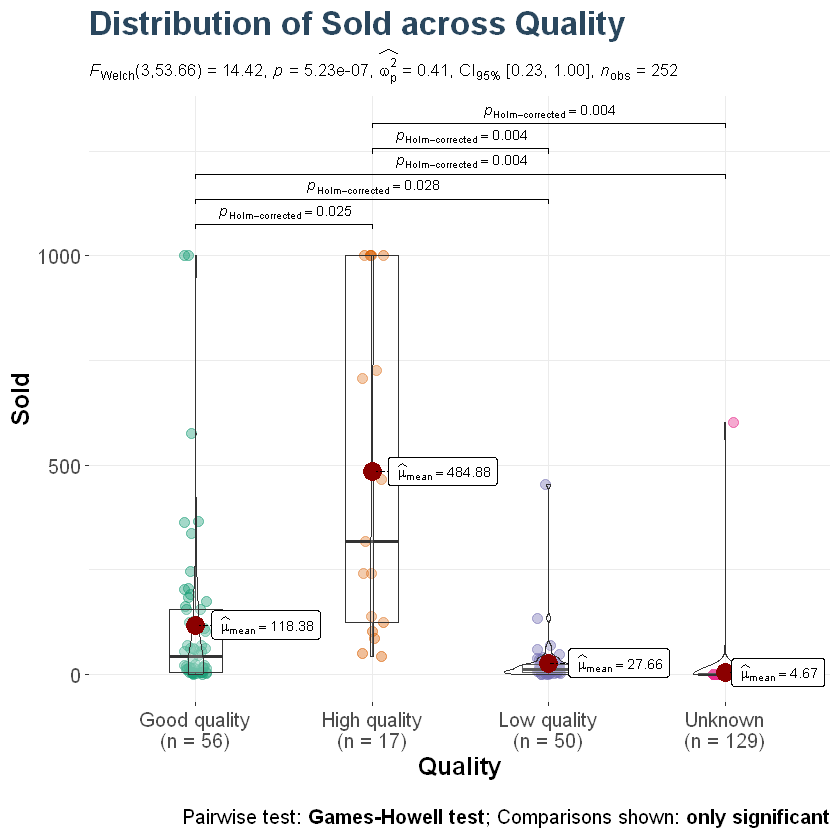

In [49]:
ggbetweenstats(
  data = df,
  x = Quality,
  y = Sold
) + labs(
    title = "Distribution of Sold across Quality"
  ) +
    theme(
    # This is the new default font in the plot
    text = element_text(size = 15, color = "black"),
    plot.title = element_text(
      #family = "Tahoma", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ))

**Nhận xét:**
+ Nhìn vào biểu đồ lập tức có thể thấy rằng có sự khác biệt rõ ràng giữa Highquality - Goodquality  và Lowquality - Uknow. Đăc biệt sản phẩm chất lượng cao có lượt bán ra chệnh lệch rất lớn.
+ Ta thấy riêng nhóm High quality có điểm xuất phát cao hơn hẵn so với các nhóm khác do quy định cần ít nhất 20 lượt bán mới có thể coi đạt chất lượng cao.
+ Ta thấy rằng sản phẩm có chất lượng tốt(lượt đánh giá tốt) thì có số lượng bán ra cao hơn rõ rệt. Điều nãy cũng dễ hiểu bởi ngay tại thời điểm mà sản phẩm đó có lượt đánh giá thấp, người tiêu dùng sẽ lập tức không để tâm hay phí tiền để mua nó nữa. Ngược lại sẽ có xu hướng tập trung vào những sản phẩm có lượt đánh giá tốt nên các sản phẩm đó lại có lượt bán tăng nhanh.
+ Ta nhận thấy có hơn 50% số lượng cho phân loại Unknow. Điều này cho thấy thị trường Tiki vẫn còn nghèo nàn và khó cho các doanh nghiệp mới có thể phát triển khi chưa có được sự tin tưởng từ khách hàng. Bởi khi chưa có lượt đánh giá để hiểu hơn về sản phẩm thì người tiêu dùng thường sẽ chọn 1 sản phẩm đáng tin hơn cho bản thân khiến các sản phẩm khó để bán ra trong thời gian đầu.
+ Không có nhiều sản phẩm đạt Highquality bởi khi càng có nhiều đánh giá thì chất lượng sản phẩm sẽ càng rõ ràng, những nhược điểm của sản phẩm sẽ lộ ra nhiều hơn và đưa sản phẩm về đúng chất lượng của nó.

----
**Phát biểu giả thuyết:**

Kiểm tra xem có sự ảnh hưởng giữa giá tiền đến số lượng sản phẩm bán ra không ?
+ H0: Giá bán không có sự ảnh hưởng  đến tốc độ bán sản phẩm (Hai biến này là độc lập)
+ H1: Giá bán ảnh hưởng đến tốc độ bán sản phẩm (Hai biến này có phụ tuộc vào nhau)



In [50]:
table(df$Valuation,df$Liquidity)
chisq.test(df$Valuation,df$Liquidity)

            
             Fast Good Slow
  good price   12   25  102
  high price    3    0   12
  low price     2   15   81

Warning message in chisq.test(df$Valuation, df$Liquidity):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  df$Valuation and df$Liquidity
X-squared = 11.3, df = 4, p-value = 0.02339


pvalue < 0.05

Chấp nhận giả thuyết H1. Điều này có nghĩa là Giá bán có ảnh hưởng đến tốc độ bán của sản phẩm
 

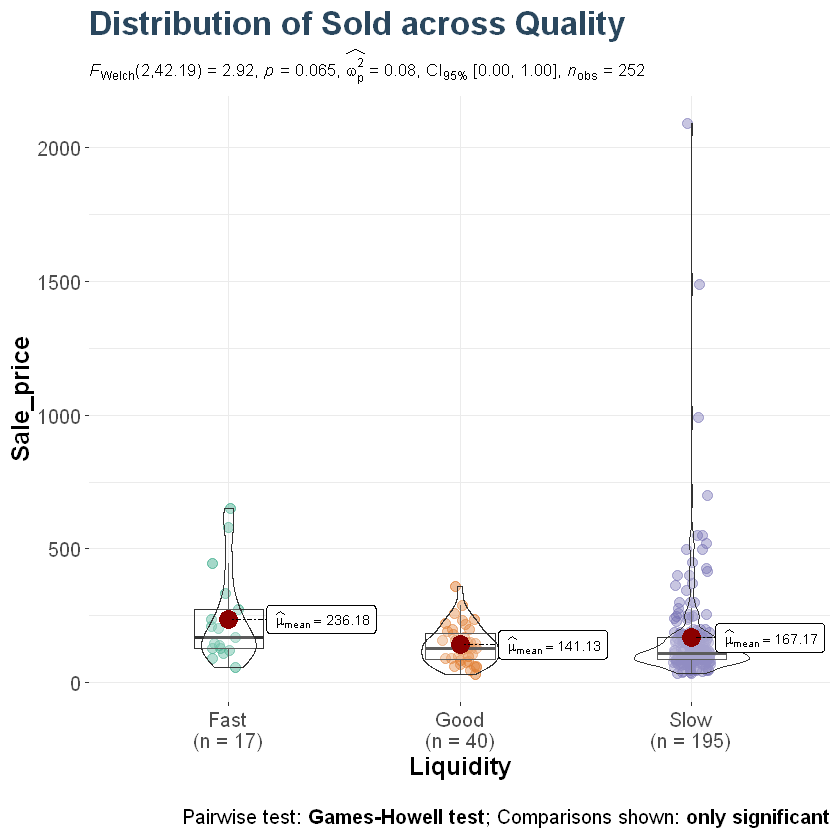

In [51]:
ggbetweenstats(
  data = df,
  x = Liquidity,
  y = Sale_price
) + labs(
    title = "Distribution of Sold across Quality"
  ) +
    theme(
    # This is the new default font in the plot
    text = element_text(size = 15, color = "black"),
    plot.title = element_text(
      #family = "Tahoma", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ))

**Nhận xét:**
+ Ở mục Slow có nhiều sản phẩm chưa bán được nên có sự phân bố giá tương đối rộng hơn so với cái thanh khoản(Liquidity) khác.
+ Sản phẩm ở thanh khoản Good và Fast có sự phân bố rõ rằng tập trung nằm trong một khoảng nhất định.
+ Các sản phẩm có tốc độ bán càng cao thì có điểm xuất phát càng cao hơn.
+ Có khoảng 70% sản phẩm trên Tiki được bán với tốc độ chậm, Tiki nên xem xét lại chính sách của mình và quảng cáo, thu hút người dùng nhiều hơn.
+ Có rất ít sản phẩm có thể phát triển tốt ở Tiki khi mục Fast chỉ chiếm chưa đến 10% trên tông sản phẩm.


# Kiểm định Kruskal - Wallis

Kiểm định Kruskal - Wallis giúp kiểm tra sự phân phối của hai mẫu(khá giống kiểm định ANOVA) mà không cần phải giả định phân phối chuẩn

**Phát biểu giả thuyết:**

Kiểm tra xem liệu các sản phẩm có bảo hành có bán sản phẩm với giá cao hơn các sản phẩm khác ?

+ H0 : Không có sự khác biệt về giá giữa các sẩn phẩm có bảo hành và không bảo hành
+ H1 : Có sự khác biệt về giá giữa các sản phẩm có bảo hành và không có bảo hành

In [52]:
check_w = c() 
for (i in df$Warranty) {
    if (i == 0){
        check_w <- c(check_w,'Non')
    } else { 
        check_w <- c(check_w,'Warranty')
    }
}
War_tab = data.frame(df$Sale_price,check_w)
data.frame(table(check_w))
names(War_tab) <- c('Price','Warranty')
head(War_tab)

check_w,Freq
<fct>,<int>
Non,108
Warranty,144


,Price,Warranty
,<dbl>,<chr>
1,57.1,Non
2,148.0,Warranty
3,129.0,Warranty
4,145.0,Non
5,158.0,Non
6,192.0,Warranty


In [53]:
kruskal.test(Warranty ~ Price, data = War_tab) 


	Kruskal-Wallis rank sum test

data:  Warranty by Price
Kruskal-Wallis chi-squared = 139.39, df = 135, p-value = 0.3803


pvalue > 0.05 

Với mức ý nghĩa 0.05, có thể chấp nhận giả thuyết H0 rằng không có sự khác biệt giữa nhóm có bảo hành và nhóm không có bảo hành

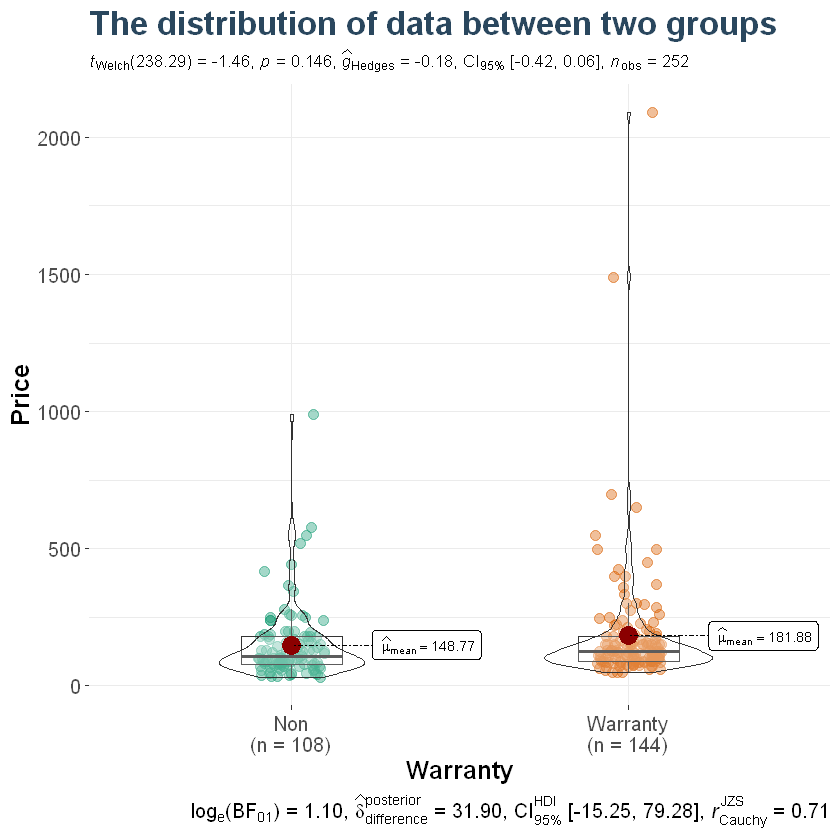

In [54]:
ggbetweenstats(
  data = War_tab,
  x = Warranty,
  y = Price
) + labs(
    title = "The distribution of data between two groups"
  ) +
    theme(
    # This is the new default font in the plot
    text = element_text(size = 15, color = "black"),
    plot.title = element_text(
      #family = "Tahoma", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ))

----
**Phát biểu giả thuyết:**

Kiểm tra xem có sự khác biệt về lượng sản phẩm bán ra giữa các sản phẩm có chính sách bảo hành và không có chinh sách bảo hành

+ H0: Không có sự khác biệt về lượng sản phẩm bán ra giữa nhóm sản phẩm có chính sách bảo hành và nhóm sản phẩm không có chính sách bảo hành.
+ H1:  Có sự khác biệt về lượng sản phẩm bán ra giữa nhóm sản phẩm có chính sách bảo hành và nhóm sản phẩm không có chính sách bảo hành.

In [56]:
Sold_in_Wrt <- data.frame(df$Sold,check_w)
names(Sold_in_Wrt) <- c('Sold','Warranty')
head(Sold_in_Wrt)

,Sold,Warranty
,<int>,<chr>
1,364,Non
2,85,Warranty
3,185,Warranty
4,1000,Non
5,55,Non
6,39,Warranty


In [57]:
kruskal.test(Warranty ~ Sold, data = Sold_in_Wrt) 


	Kruskal-Wallis rank sum test

data:  Warranty by Sold
Kruskal-Wallis chi-squared = 70.702, df = 68, p-value = 0.3875


pvalue > 0.05 

Không có sự khác biệt về phân phối của lượt bán ra giữa các nhóm có bảo hành và không có bảo hành

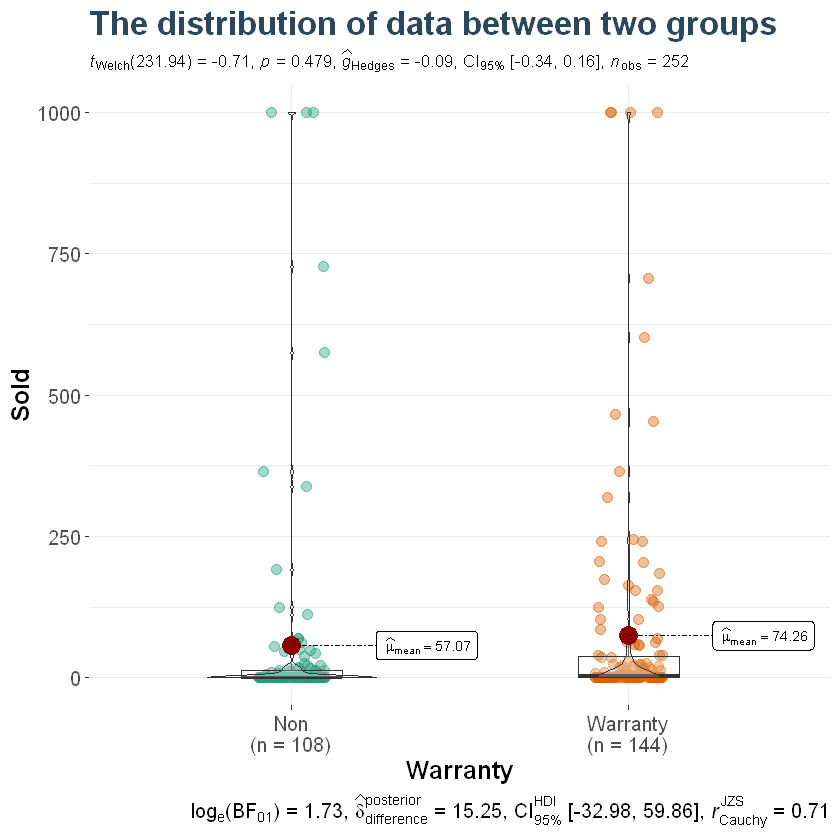

In [ ]:
ggbetweenstats(
  data = Sold_in_Wrt,
  x = Warranty,
  y = Sold
) + labs(
    title = "The distribution of data between two groups"
  ) +
    theme(
    # This is the new default font in the plot
    text = element_text(size = 15, color = "black"),
    plot.title = element_text(
      #family = "Tahoma", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ))